# Data cleaning and merging dataframes

## Loading multiple datasets

### Google way

In [ ]:
import pandas as pd

# orderlines.csv
url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders.csv
url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands.csv
url = 'https://drive.google.com/file/d/1BrNrIY0F1LbyXtyaQygUBXVxQGB3JBqx/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products.csv
url = 'https://drive.google.com/file/d/1UfsHI80cpQqGfsH2g4T4Tsw8cWayOfzC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

df_list = [orderlines, orders, brands, products]
files = ['orderlines','orders','brands','products']

In [ ]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [ ]:
orders.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [ ]:
brands.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [ ]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


### Classical way

Reading file by file

In [ ]:
# import pandas as pd

# path = '../data/eniac/'
# orderlines = pd.read_csv(path + 'orderlines.csv')
# orders = pd.read_csv(path + 'orders.csv')
# brands = pd.read_csv(path + 'brands.csv')
# products = pd.read_csv(path + 'products.csv')

# df_list = [orderlines, orders, brands, products]
# files = ['orderlines','orders','brands','products']

### Another way

Using `os` and a loop to read all the files from a directory. It's also possible to read only files with a certain extension (like `.csv`):

In [ ]:
# import pandas as pd
# import os
# path = '../data/eniac/'
# path, dirs, files = next(os.walk(path))
# #print(files)

# # remove non-csv files
# for file in files:
#     if not file.endswith("csv"):
#         files.remove(file)

In [ ]:
# # create empty list 
# df_list = []

# # append datasets to the list
# for file in files:
#     temp_df = pd.read_csv(path + file, sep=',')
#     df_list.append(temp_df)

# # show results
# products, orders, orderlines, brands = df_list[0], df_list[1], df_list[2], df_list[3]

## Data quality

### Missing values

In [ ]:
# we can check missing values column
orderlines.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [ ]:
# or for the whole dataframe
orderlines.isna().sum().sum()

0

In [ ]:
products.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [ ]:
# the .info() method also tells us the "Non-Null Count" for each column
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


### Duplicates

The presence of duplicate rows is generally a sign that the data is not clean, and will deserve further exploration.

In [ ]:
orderlines.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
brands.duplicated().sum()

0

In [ ]:
products.duplicated().sum()

8746

### Data cleanliness - initial assessment

Based on our initial exploration, we know we will need to deal with some missing values. The biggest issue so far are the duplicates on the `products` DataFrame. Here are some aspects that we will need to fix or, at least, explore further:

* **products**: 
    * `price` and `promo_price` are loaded as objects. They should be floats. 
    * Missing values: 
        * `description`: 7 missing values. Maybe that could be inferred from the product name?
        * `price`: the missing values could be filled from the `orderlines` dataset. But first we will need to clean it. 
    * Duplicates: a total of 8746 duplicates seems to indicate this DataFrame has been seriously corrupted.
    
* **orders**: 
    * `created_date` should have a date data type. Then, it would be a good quality check to see if the created date for `orders` matches with the created dates for `orderlines`. 
    
* **orderlines**: 
    * `unit_price` has to be a float, something is wrong there. 
    * `date` has to be transformed to a date data type. Then, as we said, check that it matches with the `orders` dataset. 
    
* **brands**: looks fine. 

Where do we have to start? 

1. **Data consistency:** Since `orders` and `orderlines` seem very crucial to the analysis, we will start by cleaning them and checking that the information present in both DataFrames match.

2. **The "products mess":** This file seems to have many issues. We will leave it out for now and perform a proper exploration later to understand better what's going on there.

## Cleaning orders

The data consistency check we will do with `orderlines` will involve two steps: 

* the initial and last dates of the orders should be the same
* the sum of `total_paid` on both datasets should be the same

Let's start by transforming the `created_date` of the orders DataFrame and looking for its earliest and latest values:

In [ ]:
# change date datatype
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [ ]:
# option 2
orders = (
orders
    .assign(created_date = lambda df_: pd.to_datetime(df_['created_date']))
)

In [ ]:
# earliest value
min(orders['created_date'])

Timestamp('2017-01-01 00:07:19')

In [ ]:
# latest value
max(orders['created_date'])

Timestamp('2018-03-14 13:58:36')

Now we will look at the overall sum of `total_paid` for the orders table:

In [ ]:
sum(orders['total_paid'])

nan

Why do you think the result of the sum is a nan (not a number)?

In [ ]:
orders['total_paid'].isna().sum()

5

In [ ]:
import numpy as np

temp = pd.DataFrame(
    [
     [1, 2], 
     [3, np.nan],
     [6, np.nan]
    ],
columns = ['col1','col2']
)
temp

,col1,col2
0,1,2.0
1,3,NaN
2,6,NaN


In [ ]:
temp['col2'].isna().sum()

2

There are missing values! We can explore them and see how they are all "Pending" orders:

In [ ]:
orders['total_paid'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
226904    False
226905    False
226906    False
226907    False
226908    False
Name: total_paid, Length: 226909, dtype: bool

In [ ]:
orders.loc[orders['total_paid'].isna()]

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


Since these orders are only a tiny fraction and there's a valid reason why the `total_paid` value is missing, we will simply exclude them from the dataset:

In [ ]:
# orders.dropna(inplace=True)
# option 2
orders = (
orders
    .dropna(subset=['total_paid'])
 )

Now the dataset is clean. And the total paid is: 

In [ ]:
sum(orders['total_paid'])

129159615.06991275

## Cleaning orderlines

Following our data consistency check, will now gather in the orderlines DataFrame the same information we got from orders:

* the initial and last dates
* the sum of `total_paid`


First let's transform our date time:

In [ ]:
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [ ]:
min(orderlines['date'])
# orders: Timestamp('2017-01-01 00:07:19')

Timestamp('2017-01-01 00:07:19')

In [ ]:
max(orderlines['date'])
# orders: Timestamp('2018-03-14 13:58:36')

Timestamp('2018-03-14 13:58:36')

**It's a match!**

Now let's check the `total_paid` for orderlines. It's not going to be as easy as with the orders DataFrame, considering the structure of orderlines:


In [ ]:
orderlines.sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date
160053,1433961,437639,0,1,APP2072,986.59,2017-11-24 09:22:45
272994,1616796,512881,0,1,APP2508,391.00,2018-02-16 13:06:55
197506,1489504,460108,0,1,GTE0124,667.70,2017-12-11 17:53:35
122269,1362349,404901,0,1,CRU0032,69.99,2017-09-26 15:27:42
194246,1485142,458464,0,1,MIC0036,69.99,2017-12-09 20:51:09
267016,1606798,508512,0,1,ZAG0034,9.99,2018-02-09 01:26:33
175932,1461026,449512,0,1,TRK0009,26.99,2017-11-27 21:22:36
280920,1630270,374535,0,1,APP0438,23.00,2018-02-28 13:19:37
100043,1310181,385629,0,1,APP1735,469.00,2017-08-03 00:17:23
161843,1437189,439113,0,1,MOS0240,30.59,2017-11-24 13:29:57



To get this value, we will have to calculate a new column, total price for each row. It would be `product_quantity` * `unit_price`. This operation will require that both columns have a numeric data type:

In [ ]:
orderlines.dtypes

id                           int64
id_order                     int64
product_id                   int64
product_quantity             int64
sku                         object
unit_price                  object
date                datetime64[ns]
dtype: object

In [ ]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


...it's not the case right now, so we will have to transform the `unit_price` to a numeric data type. 

In [ ]:
# uncomment the line of code below and read the error it produces:
# orderlines['product_quantity'] * pd.to_numeric(orderlines['unit_price'])

While trying to transform this column to numeric an error appears. From the error message, 

> "Unable to parse string '1.137.99' at position 6"

it seems that our dataset has some problems with the thousands separators: they were encoded as dots, and Python & pandas only admit one dot per number: the _decimal_ separator!

Lesson learned: do not use thousand separators in databases / statistical software / programming languages! Sadly, it's too late for us, and we will have to deal with the issue.

There are many ways to approach this problem. The first thing we will do is to count how many dots appear for each `unit_price` value, using string operations. If there are two or more dots a value, we will consider it corrupted —and either try to fix it, or remove it completely.

In [ ]:
# we create a copy of the dataset
ol_temp = orderlines.copy()

# create a new column with the amount of dots in the unit_price column
ol_temp['dots'] = orderlines['unit_price'].str.count('\.') # the backslash 'escapes' the special meaning of '.' in string operations

# show the rows with more than one dot
ol_temp.query('dots > 1')

,id,id_order,product_id,product_quantity,sku,unit_price,date,dots
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21,2
11,1119126,299549,0,1,PAC0929,2.565.99,2017-01-01 02:07:42,2
15,1119131,299553,0,1,APP1854,3.278.99,2017-01-01 02:14:47,2
43,1119195,299582,0,1,PAC0961,2.616.99,2017-01-01 08:54:00,2
59,1119214,299596,0,1,PAC1599,2.873.99,2017-01-01 09:53:11,2
...,...,...,...,...,...,...,...,...
293862,1649999,452946,0,1,APP2075,2.999.00,2018-03-14 13:03:33,2
293887,1650045,527321,0,1,PAC2148,3.497.00,2018-03-14 13:10:15,2
293889,1650050,527324,0,1,PAC2117,3.075.00,2018-03-14 13:10:56,2
293911,1650088,527342,0,1,APP2492,1.329.00,2018-03-14 13:24:51,2


Our theory about the thousands separators is confirmed. How can we solve this problem? 

Let's remove all the dots for all the `unit_price`, and then add a dot before the last 2 digits to all the rows. Then we will transform it into numeric values.

##### step 1: remove all dots
a) A "corrupted" price like `1.137.99`	will become `113799`

b) A correct price like `37.99`	will become `3799`

##### step 2: add dots two digits before the end of the number
a) The "corrupted" price will go from `113799` to `1137.99`

b) The correct price will go from `3799` back to `37.99`.

In [ ]:
(
orderlines
    .assign(new_sku = lambda df_: df_['sku'].str.replace('0','_'))
    .head(3)
)

,id,id_order,product_id,product_quantity,sku,unit_price,date,new_sku
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,OTT_133
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,LGE__43
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,PAR__71


In [ ]:
# step 1: to remove the dots, we replace them with... nothing
orderlines = orderlines.assign(
    unit_price_nd = orderlines['unit_price'].str.replace('\.','', regex=True)
    )
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374


In [ ]:
# step 2.1: we first separate all numbers between the part that goes before the
# decimal point (integers) and the part that goes afterwards (decimals)
orderlines['integers'] = orderlines['unit_price_nd'].str[:-2]
orderlines['decimals'] = orderlines['unit_price_nd'].str[-2:]
orderlines.sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd,integers,decimals
92027,1295292,378075,0,1,TUC0252,24.99,2017-07-17 18:47:20,2499,24,99
186669,1475184,454665,0,1,BEL0371,34.99,2017-12-03 22:19:17,3499,34,99
209855,1510942,469523,0,1,WDT0351,65.99,2017-12-22 11:37:47,6599,65,99
119866,1357951,402741,0,1,SYN0163,211.59,2017-09-21 14:18:06,21159,211,59
37083,1197637,331709,0,1,PAC1924,1.022.99,2017-03-04 13:13:18,102299,1022,99
289097,1643129,524425,0,1,APP1020,63.00,2018-03-10 07:14:39,6300,63,00
212608,1516119,472029,0,1,SEA0098,323.77,2017-12-26 11:56:19,32377,323,77
171448,1452888,445909,0,1,NDA0008,25.19,2017-11-26 19:02:04,2519,25,19
72344,1260609,361803,0,1,WDT0315,71.99,2017-06-02 19:47:19,7199,71,99
220188,1530749,478861,0,1,APP2501,386.09,2018-01-01 22:18:25,38609,386,09


In [ ]:
# we create a copy of the dataset
ol_temp1 = products.copy()

# create a new column with the amount of dots in the unit_price column
ol_temp1['dots'] = products['promo_price'].str.count('\.') # the backslash 'escapes' the special meaning of '.' in string operations

# show the rows with more than one dot
ol_temp1.query('dots == 0')

,sku,name,desc,price,promo_price,in_stock,type,dots
145,PAC0185,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 2...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1639,1469,0,1282,0
146,PAC0185,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 2...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1639,1469,0,1282,0
147,PAC0185,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 2...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1639,1469,0,1282,0
148,PAC0185,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 2...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1639,1469,0,1282,0
149,PAC0185,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 2...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1639,1469,0,1282,0
...,...,...,...,...,...,...,...,...
18674,SYN0157-A,Open - Synology RT2600AC Wifi Router AC2600,Refurbished Wifi Wireless Router AC2600 17GHz ...,229.9,222,0,1334,0
18686,IFX0041-A,Open - iFixit P6 Battery Pentalobe screwdriver...,Refurbished devices screwdriver for MacBook Pr...,8.95,6,0,14305406,0
18697,APP0432-A,Open - Apple Lightning connector cable to USB ...,Lightning USB cable 1 meter to charge and sync...,25,18,0,1230,0
18883,PAC2286,"Second hand - Apple LED Cinema Display 24 """,Monitor Refurbished Apple Cinema Display 24 inch,899,499,0,1282,0


In [ ]:
# step 1: to remove the dots, we replace them with... nothing
products = products.assign(promo_price_nd = products['promo_price'].str.replace('\.','', regex=True))
products.head()

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,499899
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,589996
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,569898
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,229997
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,3199


In [ ]:
products['integers'] = products['promo_price_nd'].str[:-2]
products['decimals'] = products['promo_price_nd'].str[-2:]
products.head()

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,499899,4998,99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,589996,5899,96
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,569898,5698,98
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,229997,2299,97
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,3199,31,99


In [ ]:
products['new_promo_price'] = products['integers'] + '.' + products['decimals']
products.head()

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,499899,4998,99,4998.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,589996,5899,96,5899.96
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,569898,5698,98,5698.98
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,229997,2299,97,2299.97
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,3199,31,99,31.99


In [ ]:
# step 2.2: we now concatenate those two parts of the number, with a dot in between
orderlines['new_unit_price'] = orderlines['integers'] + '.' + orderlines['decimals']
orderlines.sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd,integers,decimals,new_unit_price
61973,1242172,352978,0,1,PAC1061,3.157.99,2017-05-05 12:32:32,315799,3157,99,3157.99
191878,1481937,457176,0,1,PAC2087,2.973.59,2017-12-07 15:41:05,297359,2973,59,2973.59
46350,1214807,339785,0,1,QNA0131,1.026.99,2017-03-27 18:19:23,102699,1026,99,1026.99
202442,1496473,462847,0,1,BEL0311,19.99,2017-12-14 12:38:27,1999,19,99,19.99
270672,1612712,511070,0,1,APP2121,1.192.00,2018-02-13 23:55:35,119200,1192,00,1192.00
276062,1621913,515140,0,2,SNS0020,161.00,2018-02-21 00:08:11,16100,161,00,161.00
80538,1274702,368813,0,1,APP1190,70.00,2017-06-25 22:45:24,7000,70,00,70.00
240391,1564636,492377,0,1,MIC0036,64.99,2018-01-16 19:31:03,6499,64,99,64.99
5623,1135000,304747,0,1,PUR0138,35.99,2017-01-08 13:44:35,3599,35,99,35.99
223781,1537636,482093,0,1,PAC2081,2.859.59,2018-01-04 16:54:00,285959,2859,59,2859.59


We will now try again to convert this column to a numeric data type:

In [ ]:
orderlines['unit_price'] = pd.to_numeric(orderlines['new_unit_price'])
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
 7   unit_price_nd     293983 non-null  object        
 8   integers          293983 non-null  object        
 9   decimals          293983 non-null  object        
 10  new_unit_price    293983 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 24.7+ MB


Data cleaning done! 

Back to data consistency: Now it is time to multiply `product_quantity` and `unit price`, sum all the rows and check whether the value matches the sum of the `total_paid` from the orders DataFrame: 

In [ ]:
# drop 'auxiliary' columns
orderlines.drop(columns=['unit_price_nd','decimals','integers','new_unit_price'], inplace=True)

# create a new column "total_price" by multiplying product_quantity with unit_price
orderlines['total_price'] = orderlines['product_quantity'] * orderlines['unit_price']

# sum of the new column "total_price":
sum(orderlines['total_price'])

128776222.0298095

Sadly, it does not match exactly the sum of `total_paid` from orders:

In [ ]:
orders['total_paid'].sum()

129159615.07000001

The mismatch is about 383 thousand dollars, a non-negligible amount of money:

In [ ]:
sum(orderlines['total_price']) - orders['total_paid'].sum()

-383393.040190503

In [ ]:
(
orderlines
    .groupby('id_order')
    .agg(total_price = ('total_price','sum'))
    .reset_index()
    .merge(orders, how='inner', left_on='id_order',right_on='order_id')
    .assign(diff = lambda df_:  round(df_['total_paid'] - df_['total_price'], 2))
    .query('state =="Completed" & diff != 0 & diff < 25 & diff > -25')
    # .groupby('diff')['diff'].count()
    # .sort_values(ascending=False)
)

,id_order,total_price,order_id,created_date,total_paid,state,diff
1,241423,129.16,241423,2017-11-06 13:10:02,136.15,Completed,6.99
2,242832,10.77,242832,2017-12-31 17:40:03,15.76,Completed,4.99
3,243330,77.99,243330,2017-02-16 10:59:38,84.98,Completed,6.99
6,245595,105.98,245595,2017-01-21 12:52:47,112.97,Completed,6.99
8,246018,206.96,246018,2017-02-13 23:02:57,211.95,Completed,4.99
...,...,...,...,...,...,...,...
204403,527042,13.99,527042,2018-03-14 11:47:50,18.98,Completed,4.99
204423,527070,19.98,527070,2018-03-14 11:50:48,24.97,Completed,4.99
204426,527074,19.98,527074,2018-03-14 11:51:42,24.97,Completed,4.99
204444,527096,29.97,527096,2018-03-14 11:58:40,34.96,Completed,4.99


How can we figure out where the difference comes from? 

## Matching `orders` and `orderlines`

It is possible that some orders exist in one dataset but not in the other one. This would be a potential source for this price mismatch. Let's find out!

We first create a new column in the `orderlines` dataset using `assign`. We also use `isin()` to create a boolen value (True/False) that checks whether the `id_order` is present in the `orders` dataset:

In [ ]:
orderlines.assign(check_orders = orderlines['id_order'].isin(orders['order_id']))

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True
...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True


In [ ]:
orderlines['id_order'].isin([299542,527400,527401])

0         False
1         False
2         False
3          True
4         False
          ...  
293978    False
293979    False
293980     True
293981    False
293982     True
Name: id_order, Length: 293983, dtype: bool

In [ ]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
 7   total_price       293983 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 17.9+ MB


Then, using `.query` we select rows where the value in this new column is `False`:

In [ ]:
(
orderlines
    .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
    .query("check_orders==False")
)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27,2317.90,False
63,1119218,296284,0,1,BNQ0042,699.00,2017-01-01 09:58:35,699.00,False
67,1119223,294806,0,1,APP1849,2558.99,2017-01-01 10:09:15,2558.99,False
69,1119226,294806,0,1,APP1864,2797.99,2017-01-01 10:15:14,2797.99,False
70,1119235,297261,0,1,QNA0177,304.99,2017-01-01 10:17:59,304.99,False
...,...,...,...,...,...,...,...,...,...
275665,1621177,244328,0,1,OWC0260,349.00,2018-02-20 13:00:45,349.00,False
280055,1628699,261391,0,1,APP2352,3343.00,2018-02-27 11:43:25,3343.00,False
280352,1629247,287797,0,1,SYN0182,484.11,2018-02-27 19:16:26,484.11,False
280856,1630150,261391,0,1,SAT0091,44.99,2018-02-28 12:18:26,44.99,False


It looks like 240 rows in `orderlines` come from orders not present in the `orders` dataset. This is quite inconsistent, since the `orders` dataset should be the one and only source of truth for orders: if an order is not there, it should not exist. We will definitely report this anomaly, but for now, let's just remove those "ghost" orders:

In [ ]:
orderlines = (orderlines
              .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
              .query("check_orders==True"))

Now let's look at this problem in the opposite direction: are there orders in the `orders` dataset not present in `orderlines`?

In [ ]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False"))

,order_id,created_date,total_paid,state,check_orders
8,245941,2017-01-01 10:32:23,183.52,Completed,False
65,268629,2017-01-31 11:27:25,73.23,Completed,False
75,272862,2017-04-18 18:17:10,128.99,Pending,False
82,277655,2017-02-01 08:44:55,9.99,Pending,False
83,277994,2017-01-23 18:30:11,52.99,Completed,False
...,...,...,...,...,...
226835,527328,2018-03-14 13:14:12,0.00,Shopping Basket,False
226851,527344,2018-03-14 13:25:21,0.00,Place Order,False
226853,527346,2018-03-14 13:26:14,0.00,Place Order,False
226855,527348,2018-03-14 13:28:18,0.00,Place Order,False


There are more than 22000 orders in the `orders` dataset that are not present on the `orderlines` dataset!!! We can try to find out why by looking at the state of these orders:

In [ ]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False")
 ['state'].value_counts())

Place Order        12304
Shopping Basket     9810
Completed             45
Cancelled             41
Pending               13
Name: state, dtype: int64

It looks like most of them are orders that were not fully completed: the products were left in the shopping basket or the order was "placed" but maybe not paid (hence the state "Place Order". Some of them were "Completed", though. 

This will require further research, and we might have to come back to these orders if we have to explore consumer behaviour (e.g. why are orders left in the shopping basket?), but for now, for the sake of data consistency, let's drop all of these unmatched orders:

In [ ]:
orders = (orders
          .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
          .query("check_orders==True")
         )

Let's now check again if the total paid matches:

In [ ]:
orders['total_paid'].sum()

129130877.18

In [ ]:
orderlines['total_price'].sum()

128659393.77

STILL NOT MATCHING!!! And actually, the difference got larger. This is outrageous. Let's keep exploring.

In [ ]:
orderlines['total_price'].sum() - orders['total_paid'].sum()

-471483.4100000113

## Solving the price mismatch

Let's merge both datasets and compare, order by order, the `total_price`. We will call this new merged dataset `orders_info`.

*Note: Remember that the `orderlines` dataset contains one row per product bought: an order where 3 different products were purchased will result in 3 rows there. Therefore, to merge `orderlines` with `orders`, we have to group `orderlines` by its `id_order` and aggregate it by taking the sum of the `total_price`.

In [ ]:
orders_info = (
orderlines
    .groupby('id_order')
    .agg({'total_price':'sum'})
    .reset_index()
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .drop(columns=['order_id'])
    # .copy()
)
orders_info

,id_order,total_price,created_date,total_paid,state,check_orders
0,241319,44.99,2017-01-02 13:35:40,44.99,Cancelled,True
1,241423,129.16,2017-11-06 13:10:02,136.15,Completed,True
2,242832,10.77,2017-12-31 17:40:03,15.76,Completed,True
3,243330,77.99,2017-02-16 10:59:38,84.98,Completed,True
4,243784,153.87,2017-11-24 13:35:19,157.86,Cancelled,True
...,...,...,...,...,...,...
204686,527397,42.99,2018-03-14 13:56:38,42.99,Place Order,True
204687,527398,42.99,2018-03-14 13:57:25,42.99,Shopping Basket,True
204688,527399,141.58,2018-03-14 13:57:34,141.58,Shopping Basket,True
204689,527400,19.98,2018-03-14 13:57:41,19.98,Shopping Basket,True


Now that the `total` from both datasets is in the same dataframe, we can create a new column with the difference:

In [ ]:
orders_info['price_difference'] = orders_info['total_price'] - orders_info['total_paid']
orders_info.sort_values('price_difference').tail(30)

,id_order,total_price,created_date,total_paid,state,check_orders,price_difference
20654,322147,164.90,2017-02-10 11:56:59,125.99,Completed,True,38.91
11725,312311,164.90,2017-01-20 00:59:54,125.99,Completed,True,38.91
45940,349377,44.99,2017-04-24 21:42:28,4.99,Pending,True,40.00
8545,308825,164.90,2017-01-13 14:27:46,123.99,Completed,True,40.91
13784,314570,164.90,2017-01-25 09:01:35,122.99,Completed,True,41.91
21347,322901,164.90,2017-02-12 13:25:12,122.99,Place Order,True,41.91
25517,327363,164.90,2017-02-21 22:42:17,122.99,Completed,True,41.91
986,300474,164.90,2017-01-02 12:24:54,119.00,Completed,True,45.90
166458,484334,214768.02,2018-01-07 15:58:26,214714.31,Shopping Basket,True,53.71
54853,359083,13450.87,2017-05-25 13:58:31,13391.86,Shopping Basket,True,59.01


In [ ]:
orders_info['price_difference'].describe()

count    204691.000000
mean         -2.303391
std         297.461827
min      -90898.610000
25%          -0.010000
50%           0.000000
75%           0.000000
max       36159.900000
Name: price_difference, dtype: float64

Looks like the maximum and minimum price differences are huge: some orders are really corrupted. But we also see from the mean and the quartiles that the price difference is neglegible for most orders.

## Challenge: Remove outliers

Decide on a criterion for removing orders whenever you cannot trust the price difference between `orders` and `orderlines`. 

Note: this solution does not completely achieve 100% trustable data, but the objective here is to end up with the best possible data within a limited amount of time, which makes a complete revision of the database protocols and the data pipelines is not feasible - and business questions are pending. Documenting and reporting this data cleaning process, including the criterion that you will use for determining what do you consider an "outlier", is key. Not being paralyzed by it is also important!

**Finding Outliers Using the Interquartile Rule**

We can use the interquartile range to identify outliers 
* Determine the data's interquartile range.
* Multiply the interquartile range (IQR) by 1.5 - call this 1.5_iqr
* Add 1.5_iqr to the 75th percentile. Any figure above this is thought to be an outlier.
* Subtract 1.5_iqr from the 25th percentile. Any value below this is thought to be an outlier.

Just keep in mind that the interquartile rule is simply a generalisation, not all situations call for it. In general, you should always check to see if the resulting outliers make sense by reviewing them after conducting your outlier analysis.

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

# Calculate the 25th & 75th percentiles
Q1 = orders_info['price_difference'].quantile(0.25)
Q3 = orders_info['price_difference'].quantile(0.75)
# Calculate the interquartile range
IQR = Q3-Q1
# filter the DataFrame to include only "non-outliers"
filtered = orders_info.loc[(orders_info['price_difference'] >= (Q1 - 1.5*IQR)) & (orders_info['price_difference'] <= (Q3 + 1.5*IQR)), :]

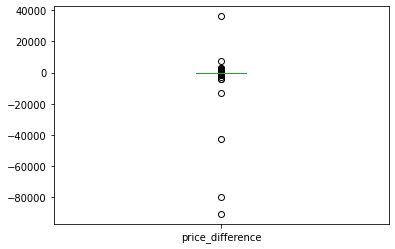

In [ ]:
(
orders_info
    # .query('-25 < price_difference < 25')
    ['price_difference']
    # .describe()
    # .hist(bins=25)
    .plot.box()
)

In [ ]:
(
orderlines
    .assign(short_brand = lambda df_: df_['sku'].str[:3])
    .query('short_brand == "REP"')
    ['unit_price']
    .describe()
    # .plot.box()
)

count    1587.000000
mean       73.739471
std        38.653355
min        14.310000
25%        49.990000
50%        59.990000
75%        79.990000
max       479.650000
Name: unit_price, dtype: float64

In [ ]:
filtered.head()

,id_order,total_price,created_date,total_paid,state,check_orders,price_difference
0,241319,44.99,2017-01-02 13:35:40,44.99,Cancelled,True,0.0
5,245275,149.00,2017-06-28 11:35:37,149.00,Completed,True,0.0
7,245851,79.99,2017-04-04 20:58:21,79.99,Pending,True,0.0
11,247643,153.54,2017-05-26 11:50:35,153.54,Completed,True,0.0
13,251302,140.99,2017-05-10 12:27:33,140.99,Completed,True,0.0


In [ ]:
filtered.shape

(156882, 7)

In [ ]:
# upper limit
Q3 + 1.5*IQR

0.014999999999986358

In [ ]:
# lower limit
Q1 - 1.5*IQR

-0.024999999999977263

Save the data once you are sure you can trust it!

In [ ]:
#orderlines.to_csv('orderlines_cl.csv', index=False)
#orders.to_csv('orders_cl.csv', index=False)

#from google.colab import files
#files.download("orderlines_cl.csv")
#files.download("orders_cl.csv")

## Challenge: Cleaning products

Now it is time to clean the products dataset. Let's do a quick review of its major problems: 

In [ ]:
print(products.info(), "\n")
print("Missing values:", products.isna().sum(), "\n")
print("Duplicate rows:", products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku              19326 non-null  object
 1   name             19326 non-null  object
 2   desc             19319 non-null  object
 3   price            19280 non-null  object
 4   promo_price      19326 non-null  object
 5   in_stock         19326 non-null  int64 
 6   type             19276 non-null  object
 7   promo_price_nd   19326 non-null  object
 8   integers         19326 non-null  object
 9   decimals         19326 non-null  object
 10  new_promo_price  19326 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB
None 

Missing values: sku                 0
name                0
desc                7
price              46
promo_price         0
in_stock            0
type               50
promo_price_nd      0
integers            0
decimals            0
new_promo_pr

Looking at this overview, we can see that there are different things that have to be changed: 

* Data types: 
    * `price` should be a float
    * `promo price` should be a float
* Duplicated rows. They have to be removed. 
    * To accomplish this step you can use the method `pd.DataFrame.drop_duplicates()`. Be sure you drop all the duplicates based on the column **sku**, as it is the one you will use to merge with orderlines. 
* Missing values: 
    * Description maybe can be inferred by the name
    * `price`. Is there a way we can extract the information from another table?
    * `type`. Do we need this column for our analysis?
    
These tasks can be accomplished using all the methods you already know.

### Start of the challenge

#### Duplicates

In [ ]:
products.drop_duplicates(subset=["sku"], keep='first', inplace=True)
products.head(3)

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,499899,4998,99,4998.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,589996,5899,96,5899.96
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,569898,5698,98,5698.98


In [ ]:
products.shape

(10579, 11)

In [ ]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,499899,4998,99,4998.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,589996,5899,96,5899.96
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,569898,5698,98,5698.98
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,229997,2299,97,2299.97
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,3199,31,99,31.99


Check if you have a unique description for each sku: 

In [ ]:
products.groupby('sku')['desc'].count().sort_values(ascending=False)

sku
8MO0001-A    1
PAC1555      1
PAC1557      1
PAC1558      1
PAC1559      1
            ..
PAC2334      0
HTE0025      0
KAN0034-A    0
APP1622-A    0
WDT0211-A    0
Name: desc, Length: 10579, dtype: int64

The product APP1197 is not unique. Let's zoom in: 

In [ ]:
products.query('sku == "APP1197"')

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price
7992,APP1197,"Apple iMac 21.5 ""Core i5 31 GHz Retina display...",Desktop Apple iMac 21.5 inch i5 31 GHz Retina ...,1729,1305.59,0,1282,130559,1305,59,1305.59


In [ ]:
products.drop_duplicates('sku').query('sku == "APP1197"')

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price
7992,APP1197,"Apple iMac 21.5 ""Core i5 31 GHz Retina display...",Desktop Apple iMac 21.5 inch i5 31 GHz Retina ...,1729,1305.59,0,1282,130559,1305,59,1305.59


I can drop the duplicates only focusing on the column 'sku': 

In [ ]:
products.drop_duplicates('sku', inplace=True)

#### Data types

In [ ]:
#  pd.to_numeric(products['price'])

It seems this time that the problem in our products prices is different from the one we found on orderlines. How is it possible that we have more than 3 digits? 

Let's look at a random sample in our dataframe to understand more about it: 

In [ ]:
products.sample(5)

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price
18565,SPH0032,Sphero Robotic SPRK + Sphere Transparent Blue,Programmable Robot SPRK + with Bluetooth 4.0+ ...,139.99,1.399.897,1,11905404,1399897,13998,97,13998.97
11857,BOS0042,Bose SoundTouch 20 Series III Wi-Fi Bluetooth ...,Wireless music system compatible with iOS and ...,399,3.349.994,0,5398,3349994,33499,94,33499.94
17957,NTE0116,NewerTech NuGuard Snap-on Case MacBook Pro 13 ...,Protector for MacBook Pro 13 elegant and easy ...,42.99,149.895,1,13835403,149895,1498,95,1498.95
17283,TUC0332,"Forte Backpack Tucano MacBook Pro 13 ""and 15"" ...",compact backpack with laptop compartment and f...,39.9,199.904,0,1392,199904,1999,04,1999.04
18577,AP20439,"Like new - Apple iMac 27 ""Core i5 3.4GHz Retin...",reconditioned iMac 27 inch and 5K Retina 3.4GH...,2105.59,1.735.595,0,"5,74E+15",1735595,17355,95,17355.95


My strategy would be: 

1. Replace missing values with a "special" string. In that case I will put "000.000" as it would represent that this value has a wrong format and has to be changed. This step is done to avoid future problems while cleaning the column price.
2. Create a new column called "price_split" with the values of price split by the `.`
3. Create a new column called "dots_count" counting the number of dots a price contains.

In [ ]:
# Replace all missing values by '000.000'
products = products.assign(price = products['price'].fillna('000.000'))

In [ ]:
# split the price and add a dot count
products = products.assign(price_split = products['price'].str.split('\.'), 
                           dots_count = products['price'].str.count('\.'))
products.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price,price_split,dots_count
17310,SYN0174,Synology DS1817 NAS server Mac and PC,NAS with 4GB of RAM and 8 bays compatible with...,9.789.904,9.789.904,0,12175397,9789904,97899,04,97899.04,"[9, 789, 904]",2
3110,APP1171,Apple iPhone 6S 64GB Space Gray,New 64GB iPhone 6S Libre.,859,8.603.306,0,NaN,8603306,86033,06,86033.06,[859],0
2388,MOP0069,Charging Dock Mophie iPhone 5 / 5C / 5S / 6,Lightning dock connector to USB for iPhone 5 /...,79.99,589.899,0,1515,589899,5898,99,5898.99,"[79, 99]",1
11178,PAC1645,QNAP TS-253A | 8GB RAM | 20TB (2x10TB) Seagate...,Nas 8GB RAM memory + 20TB (2x10TB) Hard Seagat...,1343.27,9.981.786,0,12175397,9981786,99817,86,99817.86,"[1343, 27]",1
18772,WDT0359-A,Open - 4TB WD My Passport External Hard Drive ...,External Hard Drive USB 3.0 4TB refurbished wi...,179.99,1.271.143,0,11935397,1271143,12711,43,12711.43,"[179, 99]",1
17158,OWC0232-2,Mac OWC Memory 4GB (2x2GB) 667MHz DDR2 FB-DIMM,RAM 4GB (2x2GB) for Mac Pro 2006-2008,55.98,529.895,0,1364,529895,5298,95,5298.95,"[55, 98]",1
16998,PAC2170,QNAP TS-251A-4G NAS Server | 4GB RAM | 8TB (2x...,NAS with 4GB of RAM and 8 TB capacity (2x4TB) ...,758.07,5.711.793,0,12175397,5711793,57117,93,57117.93,"[758, 07]",1
11458,MRL0008,Brown Marley Chant Mini Wireless Speaker,Bluetooth small with protective canvas for iPh...,59.99,459.897,0,5398,459897,4598,97,4598.97,"[59, 99]",1
15639,WAC0236,Wacom Bamboo Pen Digital pen,12g pointer 512 pressure levels for Bamboo MTE...,34.99,349.896,1,1229,349896,3498,96,3498.96,"[34, 99]",1
15219,STA0047-A,Open - Startech Reader / Writer SD Card 4.0 UH...,SD reader and writer SDHC or SDXC cards and US...,68.99,380.067,0,1298,380067,3800,67,3800.67,"[68, 99]",1


Now I need to look at each value in the new column "price_split" and check the following condition: 

If the last element of the value in price split has a length bigger than 2 then add a `True` inside the list `need_check`, else add a `False`. 

Example 1: 

 - Input: price_split = `[[59],[99]]` The last element of the value in price split is `[99]`. The length of this element is 2, as it only has 2 characters. Then we will append a `False` to the list `need_check`. 

Exemple 2: 

- Input: price_split = `[[234],[895]]` The last element of the value in price split is `[895]`. The length of the last element is 3, as it has 3 characters. Then we will append a `True` to the list `need_check`.

In [ ]:
need_check = []
len_split = []
for val in products['price_split']:    
    len_split.append(len(val))
    if len(val[-1]) > 2: 
        need_check.append(True)
    else:
        need_check.append(False)

In [ ]:
temp = pd.DataFrame([
              ['APP02', '789.32', ['789', '32']],
              ['APP04', '123.123', ['123', '123']],
              ['APP10', '59', ['59']]
], columns=['sku','price','list_price'])
temp

,sku,price,list_price
0,APP02,789.32,"[789, 32]"
1,APP04,123.123,"[123, 123]"
2,APP10,59,[59]


In [ ]:
need_check = []
len_split = []
for val in temp['list_price']:    
    len_split.append(len(val))
    if len(val[-1]) > 2: 
        need_check.append(True)
    else:
        need_check.append(False)

In [ ]:
temp['need_check'] = need_check
temp

,sku,price,list_price,need_check
0,APP02,789.32,"[789, 32]",False
1,APP04,123.123,"[123, 123]",True
2,APP10,59,[59],False


In [ ]:
def get_len_list(price_list): 
    return len(price_list)


def need_check_function(price_list): 
    if len(price_list[-1]) > 2: 
        return True
    else:
        return False

In [ ]:
temp.assign(
    need_check_opt2 = lambda df_: df_['list_price'].apply(need_check_function),
    list_len = lambda df_: df_['list_price'].apply(get_len_list),
    # list_length_without_apply = lambda df_: len(df_['list_price']),
    need_check_opt3 =  lambda df_ :df_['price'].str.contains(r'.*\.\d{3}$' , regex= True) 
    )

,sku,price,list_price,need_check,need_check_opt2,list_len,need_check_opt3
0,APP02,789.32,"[789, 32]",False,False,2,False
1,APP04,123.123,"[123, 123]",True,True,2,True
2,APP10,59,[59],False,False,1,False


We have created two lists: 

* `need_check`: tells us which element of the dataframe has a last element on `price_split` with a length greater than 2. 
* `len_split` : tells us how many elements are inside each `price_split`. 
    * Example 1: `[[59],[99]]` it has a length of 2
    * Example 2: `[59]` it has a length of 1
    * Example 3: `[[654],[998]]` it has a length of 2
    * Example 4: `[[9],[654],[998]]` it has a length of 3
    
Then we can add these elements into our products dataframe to detect these rows: 

In [ ]:
(
products
    .assign(need_check = lambda df_: df_['price_split'].apply(need_check_function), 
            len_split = lambda df_: df_['price_split'].apply(get_len_list))
    .query('need_check==True & len_split > 1 & dots_count != 0')
).head()

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price,price_split,dots_count,need_check,len_split
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,000.000,299.899,0,8696,299899,2998,99,2998.99,"[000, 000]",1,True,2
362,REP0043,Speaker lower repair iPhone 4,Repair service including parts and labor for i...,499.004,499.004,0,"1,44E+11",499004,4990,04,4990.04,"[499, 004]",1,True,2
480,PIE0011,Internal Battery for iPhone 3G,Replacement AC Adapter for Apple iPhone 3G.,98.978,98.978,0,21485407,98978,989,78,989.78,"[98, 978]",1,True,2
515,SEN0061,Sennheiser EZX 80 Handsfree iPhone iPad and iP...,IPhone bluetooth headset with microphone iPad ...,649.891,649.891,0,5384,649891,6498,91,6498.91,"[649, 891]",1,True,2
518,SEV0026,Service installation RAM + HDD + SSD MacBook /...,RAM + HDD installation + SSD in your MacBook /...,599.918,599.918,0,20642062,599918,5999,18,5999.18,"[599, 918]",1,True,2


By defining a set of rules, I can quickly detect the prices that are giving me errors. Those rules are: 

* The length of the last element on the value `price_split` has a length bigger than 2 (This is what the column `need_check` is telling us).
* There is more than 1 element inside the column `price_split` (Information given by the column `len_split`). 
* The number of dots in price is different than 0 (Column `dots_count`). 

The next steps would be to use these conditions to replace these values by missing values. To do it, I am going to use the function from the module `numpy` called `np.where`. It works like an `if else` statement; if a condition is met, then return a value, else, return another value. 

In [ ]:
temp = pd.DataFrame([
              ['APP02', '789.32', ['789', '32']],
              ['APP04', '123.123', ['123', '123']],
              ['APP10', '59', ['59']]
], columns=['sku','price','list_price'])
temp

,sku,price,list_price
0,APP02,789.32,"[789, 32]"
1,APP04,123.123,"[123, 123]"
2,APP10,59,[59]


In [ ]:
import numpy as np

(
temp
    .assign(
        len_list = lambda df_: df_['list_price'].apply(get_len_list),
        example_np_where = lambda df_: np.where(df_['len_list'] > 1, 'hello big list' , 'small list')
    )
)

,sku,price,list_price,len_list,example_np_where
0,APP02,789.32,"[789, 32]",2,hello big list
1,APP04,123.123,"[123, 123]",2,hello big list
2,APP10,59,[59],1,small list


In [ ]:
products= products.assign(
    need_check = lambda df_: df_['price_split'].apply(need_check_function), 
    len_split = lambda df_: df_['price_split'].apply(get_len_list)
    )
products.loc[(products.need_check==True) & (products.len_split > 1) & (products.dots_count != 0), 'price'] = 'Null'
# errors=coerce sets all none numerical values to NaN
products['price'] = pd.to_numeric(products['price'], errors='coerce')
products.query('need_check==True & len_split > 1 & dots_count != 0')

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price,price_split,dots_count,need_check,len_split
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,NaN,299.899,0,8696,299899,2998,99,2998.99,"[000, 000]",1,True,2
362,REP0043,Speaker lower repair iPhone 4,Repair service including parts and labor for i...,NaN,499.004,0,"1,44E+11",499004,4990,04,4990.04,"[499, 004]",1,True,2
480,PIE0011,Internal Battery for iPhone 3G,Replacement AC Adapter for Apple iPhone 3G.,NaN,98.978,0,21485407,98978,989,78,989.78,"[98, 978]",1,True,2
515,SEN0061,Sennheiser EZX 80 Handsfree iPhone iPad and iP...,IPhone bluetooth headset with microphone iPad ...,NaN,649.891,0,5384,649891,6498,91,6498.91,"[649, 891]",1,True,2
518,SEV0026,Service installation RAM + HDD + SSD MacBook /...,RAM + HDD installation + SSD in your MacBook /...,NaN,599.918,0,20642062,599918,5999,18,5999.18,"[599, 918]",1,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19312,REP0424,Input repair Headphones iPad,Repair service including parts and labor for iPad,NaN,69.99,0,"1,44E+11",6999,69,99,69.99,"[6, 999, 003]",2,True,3
19313,REP0421,iPad charging connector repair,Repair service including parts and labor for iPad,NaN,69.99,0,"1,44E+11",6999,69,99,69.99,"[6, 999, 003]",2,True,3
19314,REP0416,iPad front camera repair,Repair service including parts and labor for iPad,NaN,69.99,0,"1,44E+11",6999,69,99,69.99,"[6, 999, 003]",2,True,3
19315,REP0413,repair rear camera iPad,Repair service including parts and labor for iPad,NaN,69.99,0,"1,44E+11",6999,69,99,69.99,"[6, 999, 003]",2,True,3


As you can see, we replaced all the values with wrong prices with missing data. New let's drop all the columns we do not need: 

In [ ]:
products.drop(['price_split','need_check','len_split','dots_count'], axis=1, inplace=True)
products["price"].isna().sum()

587

And now is the time to find a strategy to fill these missing values. 

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10579 entries, 0 to 19325
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sku              10579 non-null  object 
 1   name             10579 non-null  object 
 2   desc             10572 non-null  object 
 3   price            9992 non-null   float64
 4   promo_price      10579 non-null  object 
 5   in_stock         10579 non-null  int64  
 6   type             10529 non-null  object 
 7   promo_price_nd   10579 non-null  object 
 8   integers         10579 non-null  object 
 9   decimals         10579 non-null  object 
 10  new_promo_price  10579 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 991.8+ KB


#### Missing values

As of now we have incremented the number of missing data (we transformed all the wrong prices to missing ones) let's find out a strategy to fill them. 

But first, let's see if they are important in our dataset:

In [ ]:
products.assign(row_na = products.isna().sum(axis=1) > 0).query('row_na == False')

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price,row_na
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,499899,4998,99,4998.99,False
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,589996,5899,96,5899.96,False
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,569898,5698,98,5698.98,False
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,229997,2299,97,2299.97,False
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,3199,31,99,31.99,False
...,...,...,...,...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,269903,2699,03,2699.03,False
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,649903,6499,03,6499.03,False
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,649903,6499,03,6499.03,False
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,649903,6499,03,6499.03,False


In [ ]:
prod_na = products.loc[products.isna().sum(axis=1) > 0,:].copy()
prod_na.head()

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,NaN,299.899,0,8696,299899,2998,99,2998.99
307,SAN0017,SanDisk Cruzer Edge USB 2.0 Flash Drive 16GB,Pendrive USB 2.0 Mac and PC.,8.0,59.895,0,NaN,59895,598,95,598.95
362,REP0043,Speaker lower repair iPhone 4,Repair service including parts and labor for i...,NaN,499.004,0,"1,44E+11",499004,4990,04,4990.04
480,PIE0011,Internal Battery for iPhone 3G,Replacement AC Adapter for Apple iPhone 3G.,NaN,98.978,0,21485407,98978,989,78,989.78
515,SEN0061,Sennheiser EZX 80 Handsfree iPhone iPad and iP...,IPhone bluetooth headset with microphone iPad ...,NaN,649.891,0,5384,649891,6498,91,6498.91


Decide which percentage of the entire dataset these products represent. Always think about how to use your time wisely: 

* Which percentage of the orders contains one of these products? In that case I have to look at orderlines.

In [ ]:
orderlines.shape[0]

293743

In [ ]:
# Orders with products with missing prices on products dataset
orderlines.loc[orderlines['sku'].isin(prod_na['sku']),:].shape[0] / orderlines.shape[0]

0.025604014393534484

In [ ]:
# this is interesting, as for the products data it is much smaller
prod_na.shape[0] / products.shape[0]

0.06040268456375839

Which impact do they have on total revenue?

In [ ]:
orderlines.loc[orderlines['sku'].isin(prod_na['sku']),:]['total_price'].sum() / orderlines['total_price'].sum()

0.027227081578374515

With 3% only of the total revenue, but we are considering all the orders, and we are only interested in the completed ones. 

In [ ]:
na_skus = prod_na['sku'].tolist()

(
orderlines
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .query('state == "Completed" & sku == @na_skus')
    ['total_price'].sum()
) / (
orderlines
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .query('state == "Completed"')
    ['total_price'].sum()
)

0.02922734355997912

In [ ]:
temp = pd.DataFrame([
              ['a',1],
              ['b',1],
              ['c',1],
              ['a',1],
              ['a',1],
              ['a',1],
              ['b',1],
              ['c',1],
              ['c',1],
], columns=['c1','c2'])
temp

,c1,c2
0,a,1
1,b,1
2,c,1
3,a,1
4,a,1
5,a,1
6,b,1
7,c,1
8,c,1


In [ ]:
list_to_filter = ["c","b"]

temp.query('c1 == @list_to_filter')

,c1,c2
1,b,1
2,c,1
6,b,1
7,c,1
8,c,1


As you can see, the products that are missing only represent 2.9% of the total revenue. 
I will not drop them, as they still have some information which I would like to keep to create categories (sku, item name and item description), so I am going to save them with prices as missing values. But I will add an extra column telling me which is the maximum price for these skus in orderlines.

In [ ]:
# find out which sku are missing in products
prod_na_list = (
products
    .loc[products['price'].isna(),'sku']
    .tolist()
)

# find them on orderlines, and aggregate the information to find the maximum value
orderlines_prod_na_max = (
orderlines
    .query("sku == @prod_na_list")
    .groupby('sku') 
    .agg({'unit_price':'max'})
    .rename(columns={'unit_price':'max_price_orderlines'})
    .reset_index()
)
orderlines_prod_na_max.head(15)

,sku,max_price_orderlines
0,ADN0023-A,16.81
1,APP0660-A,253.11
2,APP0869,539.00
3,APP0870,539.00
4,APP0871,539.00
5,APP0879,659.00
6,APP0880,659.00
7,APP1188-A,32.54
8,APP1215-A,105.73
9,APP1477,489.00


Time to add the column `max_price_orderlines` in our products data:

In [ ]:
products = (
products
    .merge(orderlines_prod_na_max, how='left',on='sku')
)
products.loc[products['max_price_orderlines'].notna()].sample(10)

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price,max_price_orderlines
7452,PAC2007,Synology DS1517 + | 8GB RAM | 50TB (5x10TB) Se...,NAS with 8GB RAM and 50TB for Mac and PC,NaN,22.769.623,0,12175397,22769623,227696,23,227696.23,2490.95
4998,PAC2035,Synology DS216 + II | WD 4TB Network for Mac a...,Synology DS216 + II with 2GB of RAM and 12TB (...,NaN,7.911.791,0,12175397,7911791,79117,91,79117.91,807.18
7549,PAC2307,Synology DS1817 + | 8GB RAM | 96TB (8x12TB) Se...,NAS with 8GB RAM and 96TB for Mac and PC,NaN,40.557.458,0,12175397,40557458,405574,58,405574.58,4524.75
4293,CEL0029,Celly extensible arm selfie with Bluetooth but...,selfie extendable arm for iPhone,NaN,69.902,0,5720,69902,699,02,699.02,6.99
4980,PAC1858,Synology DS216 + II | 12TB (2x6TB) Seagate Iro...,NAS with 12TB capacity (2x6TB) IronWolf Seagat...,NaN,7.361.785,0,12175397,7361785,73617,85,73617.85,792.99
3472,PAC1653,QNAP TS-253A | 16GB | 20TB (2x10TB) Seagate Ir...,NAS with 20TB + 16GB RAM memory (2x10TB) Seaga...,NaN,14.131.796,1,12175397,14131796,141317,96,141317.96,1399.99
7060,SAM0063-A,Open - Samsung 256GB SSD 850 PRO,SSD 256 GB 3D VNAND,NaN,1.372.363,0,1298,1372363,13723,63,13723.63,130.64
6744,SYN0166,Synology RX1217sas expansion module bays SAS 1...,Expansion unit rack format for NAS RS18017xs +...,NaN,26.190.002,0,1404,26190002,261900,02,261900.02,2619.00
1605,PAC0665,Kingston V300 SSD expansion kit 480GB + 8GB RA...,Expansion kit 480GB + SSD 8GB RAM 1066Mhz + Da...,NaN,3.085.851,0,1433,3085851,30858,51,30858.51,311.99
7459,PAC2014,Synology DS1517 + | 16GB RAM | 10TB (5x2TB) Se...,NAS server with 16GB of RAM and 10TB for Mac a...,NaN,13.727.462,0,12175397,13727462,137274,62,137274.62,1632.75


In [ ]:
(
products
    .assign(
        ultimate_price = lambda df_: np.where(np.isnan(df_['price']), df_['max_price_orderlines'], df_['price'])
        )
    .sample(20)
 )



,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price,max_price_orderlines,ultimate_price
9603,LIF0126,LifeProof Fre Waterproof Case Black iPhone 8/7,Case submersible in water and resistant to ext...,79.99,69.99,0,11865403,6999,69,99,69.99,NaN,79.99
3900,MOS0182,Moshi iVisor AG iPad Screen Protector Pro 129 ...,Matte Screen Protector for iPad anti reusable ...,40.00,329.894,0,14035403,329894,3298,94,3298.94,NaN,40.00
5556,MOS0205,Moshi iGlaze iPhone Armor Case 7 Black,protective cover two colors with metallic acce...,40.00,329.894,0,11865403,329894,3298,94,3298.94,NaN,40.00
10503,LIN0013,Linksys Wi-Fi Velop system AC2200 1 unit,Wi-Fi high-density intelligent Mesh technology,NaN,199.99,0,1334,19999,199,99,199.99,NaN,NaN
7119,OWC0206,OWC Accelsior Pro 2TB PCIe SSD Q,SSD card with PCI Express connection for Mac a...,1813.99,14.565.847,0,12215397,14565847,145658,47,145658.47,NaN,1813.99
5615,BEL0271,Air Protect SheerForce Belkin iPhone Case 7 Bl...,Case anti impact and wear resistant material a...,19.99,149.895,0,11865403,149895,1498,95,1498.95,NaN,19.99
5284,MUJ0020,Mujjo Leather Wallet Case Black Leather iPhone...,An ultra thin card case and material with vege...,49.90,31.99,0,11865403,3199,31,99,31.99,NaN,49.90
8291,TAD0009,Tado Intelligent Thermostatic head supports Ho...,Temperature controller heating radiator compat...,79.99,799.895,1,11905404,799895,7998,95,7998.95,NaN,79.99
10408,SAT0050-A,Open - Satechi Hub Adapter Pro Type-C Plata,Hub reconditioned aluminum USB port PD-C-C HDM...,99.99,459.516,0,12585395,459516,4595,16,4595.16,NaN,99.99
2345,DEV0022,Devolo dLAN 550 duo + PLC,PLC signal repeater plug.,44.99,449.878,0,1334,449878,4498,78,4498.78,NaN,44.99


And now let's store it as a products clean csv into our path: 

In [ ]:
#products.drop(['promo_price','in_stock'], axis=1).to_csv('products_cl.csv', index=False)
#files.download("products_cl.csv")

## Brands

The brands csv looks fine, so we can work with it. 

In [ ]:
#brands.to_csv('brands_cl.csv', index=False)
#files.download("brands_cl.csv")

In [ ]:
temp=(
    products
        .merge(
              orderlines
                        .groupby('sku')
                        .agg(max_price = ('unit_price', 'max')), 
               how = 'left', 
               on= 'sku'
               )
        .assign(new_price = lambda df_ : df_['max_price'] if (lambda df2_ : df2_['price'].isna()) else df_['price'])
        # .assign(new_price = lambda df_ : df_['max_price'] if df_['price'].isna() else df_['price'])
        .assign(temp =  lambda df_ : df_['price'])
)
temp

,sku,name,desc,price,promo_price,in_stock,type,promo_price_nd,integers,decimals,new_promo_price,max_price_orderlines,max_price,new_price,temp
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,499899,4998,99,4998.99,NaN,54.99,54.99,59.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,589996,5899,96,5899.96,NaN,60.49,60.49,59.00
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,569898,5698,98,5698.98,NaN,59.00,59.00,59.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,229997,2299,97,2299.97,NaN,25.00,25.00,25.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,3199,31,99,31.99,NaN,35.71,35.71,34.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,269903,2699,03,2699.03,NaN,NaN,NaN,29.99
10575,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,649903,6499,03,6499.03,NaN,NaN,NaN,69.95
10576,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,649903,6499,03,6499.03,NaN,NaN,NaN,69.95
10577,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,649903,6499,03,6499.03,NaN,NaN,NaN,69.95
